# Aula 3.2: Visualização de dados

**Objetivo:** 
*    Compreender como utilizar a representação visual de dados para comunicar informações analíticas e contar uma história de forma clara e eficaz aos leitores.

**O que você será capaz de fazer após a aula:**
*   Transformar dados brutos em insights significativos.

## Visualizações mais comuns

Para algumas visualizações: [Galeria Python](https://python-graph-gallery.com/) ou [Seaborn](https://seaborn.pydata.org/index.html)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Definindo estilo de plotagem: grade cinza no fundo e paleta de cores
#custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="darkgrid", #rc=custom_params, 
              palette="colorblind", rc={'figure.figsize':(7,6)})

#### Dataset

In [4]:
# Carregando Dataset
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Gráfico de Barras

#### Horizontal e vertical

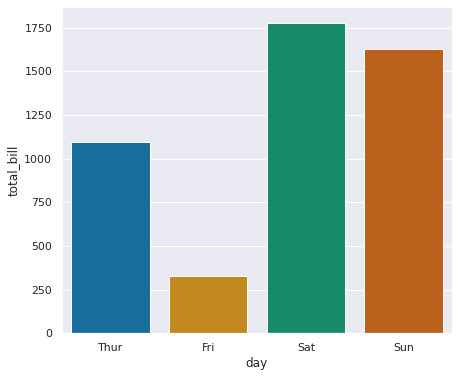

In [12]:
#https://seaborn.pydata.org/generated/seaborn.barplot.html
# Plotando um gráfico de barras
sns.barplot(
    y="total_bill",  # Para vertical: y="total_bill", 
    x="day",         #                x="day",
    data=tips, 
    estimator=sum,  
    ci=None, 
    #color='#69b3a2'
    );

#### Com ordenação

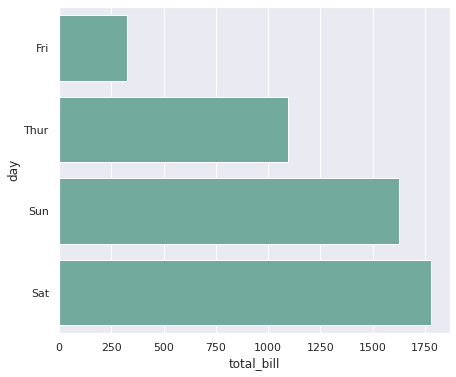

In [13]:
# Plotar o gráfico onde as barras estejam nessa ordem: ["Fri","Thur","Sun","Sat"]
sns.barplot(
    x="total_bill", 
    y="day", 
    data=tips, 
    estimator=sum, 
    ci=None, 
    order=["Fri","Thur","Sun","Sat"], 
    color='#69b3a2'
);

Reordenar o gráfico por classificação de grupo. 
Por exemplo, desejo ter o grupo com o valor mais alto na parte superior e aquele com o valor mais baixo na parte inferior.

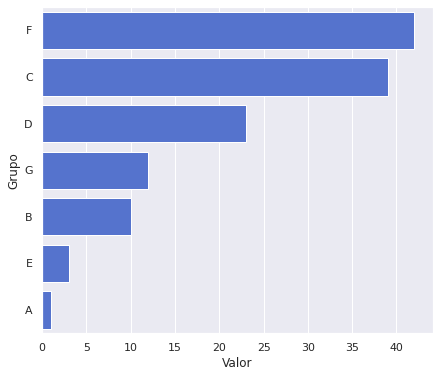

In [14]:
import pandas as pd

df = pd.DataFrame({
        'Grupo': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
        'Valor': [1, 10, 39, 23, 3, 42, 12]
})


# Reordenar o dataframe
df = df.sort_values(['Valor'], ascending=False).reset_index(drop=True)

# Gráfico
sns.barplot(
    x="Valor", 
    y="Grupo", 
    data=df, 
    estimator=sum, 
    color='royalblue'
    );

OU:

In [15]:
# Agrupa e ordeno
#result = tips.groupby(["day"])['tip'].mean().reset_index().sort_values('tip',ascending=False)
result = tips.groupby(["day"])['tip'].sum().reset_index().sort_values('tip',ascending=False)
result

,day,tip
2,Sat,260.40
3,Sun,247.39
0,Thur,171.83
1,Fri,51.96


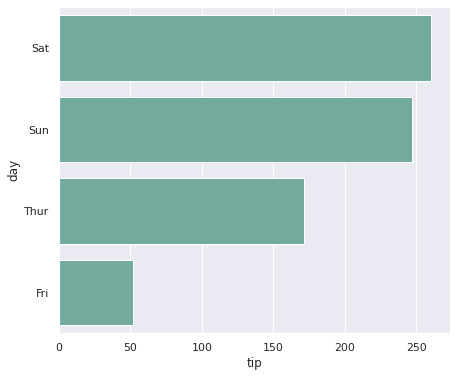

In [16]:
sns.barplot(
    x="tip", 
    y="day", 
    data=tips, 
    estimator=sum, 
    ci=None, 
    order=result['day'], 
    color='#69b3a2'
);


#### Empilhados

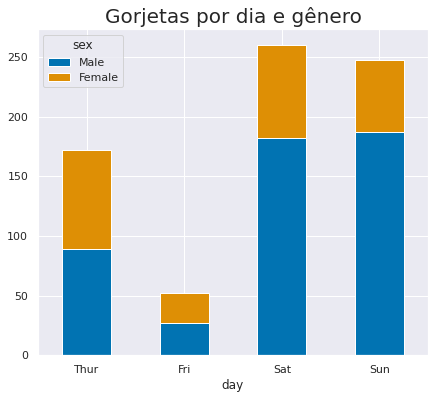

In [17]:
#https://www.w3resource.com/pandas/dataframe/dataframe-unstack.php
agg_tips = tips.groupby(['day', 'sex'])['tip'].sum().unstack()

agg_tips.plot(kind='bar', stacked=True)

# Adiciona um título e girar os rótulos do eixo x para ficarem horizontais.
plt.title('Gorjetas por dia e gênero', fontsize='20');
plt.xticks(rotation = 360);

Ou através do ggplot:

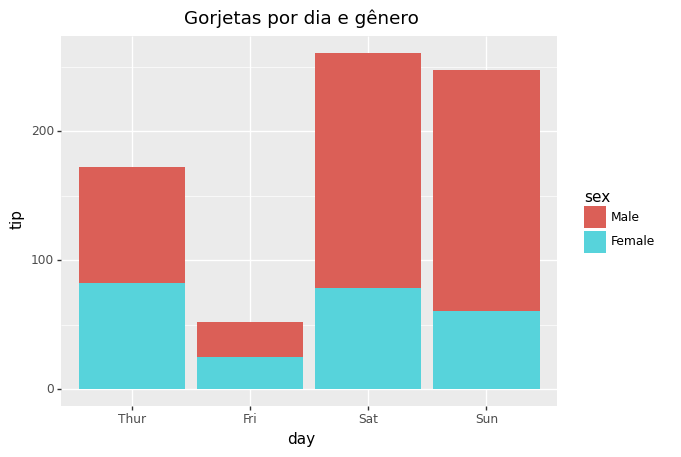

<ggplot: (8751352207497)>

In [18]:
#!pip install git+https://github.com/has2k1/plotnine.git
from plotnine import *

import warnings
warnings.filterwarnings("ignore")

(ggplot(tips, aes('day', 'tip', fill='sex'))
 + geom_bar(stat='identity', position='stack')
 + ggtitle('Gorjetas por dia e gênero'))

### Gráfico de Linhas 

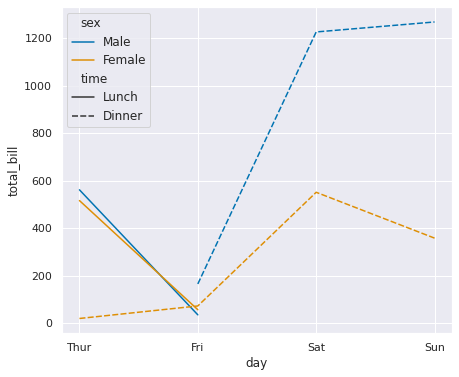

In [ ]:
#https://seaborn.pydata.org/generated/seaborn.lineplot.html
sns.lineplot(x="day", y="total_bill",
             hue="sex", 
             style="time", # ou size
             ci= None,
             estimator = sum,
             #markers=True, 
             #dashes=False,
             data=tips);

### Mapas de calor

In [ ]:
te = tips.groupby(
     by=['day']).agg({
          "total_bill":'sum',
          "tip":'sum',
      })

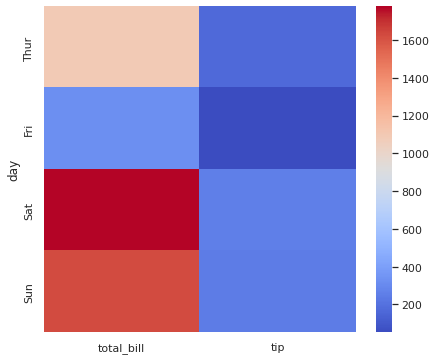

In [ ]:
#num = tips[[ "total_bill", 'size']]

sns.heatmap(te, cmap="coolwarm");

#### Correlação

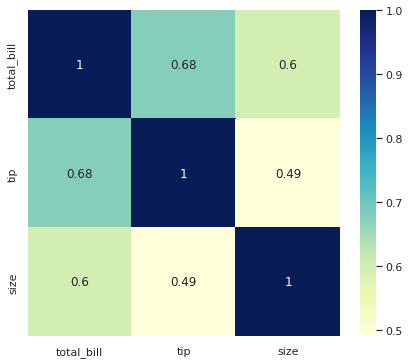

In [ ]:
import seaborn as sb

dataplot = sb.heatmap(tips.corr(), 
                      cmap="YlGnBu",
                      annot=True)

#### Outro Dataset

In [ ]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
#data

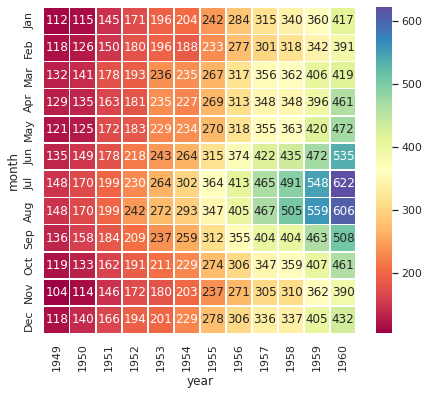

In [ ]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, cmap="Spectral");

## Histograma

### Base de dados Medidas resumo

In [ ]:
import pandas as pd
df = pd.read_excel("/content/Análise Descritiva (Medidas).xlsx")
df

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pl
0,ID12346,46,MALE,SUBURBAN,37770.90,NO,0,YES,YES,YES,YES,NO
1,ID12291,67,FEMALE,SUBURBAN,63130.10,YES,2,YES,YES,YES,NO,YES
2,ID12371,67,FEMALE,SUBURBAN,60747.50,NO,2,NO,YES,YES,YES,YES
3,ID12111,66,FEMALE,TOWN,59803.90,YES,0,NO,YES,YES,NO,NO
4,ID12235,66,FEMALE,TOWN,59503.80,YES,2,YES,YES,YES,YES,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
325,ID12165,21,MALE,TOWN,5014.21,NO,0,YES,YES,YES,YES,NO
326,ID12130,61,MALE,RURAL,2427.10,YES,1,NO,NO,YES,NO,YES
327,ID12115,36,MALE,RURAL,1947.60,YES,0,NO,YES,YES,YES,NO
328,ID12414,18,FEMALE,RURAL,1610.90,NO,2,YES,YES,YES,NO,NO


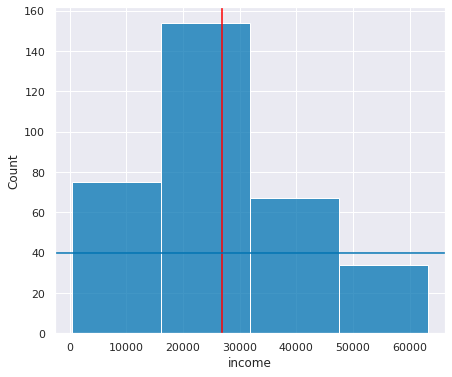

In [ ]:
#https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(data=df, 
             x="income", 
             #y ='income'
             #binwidth=1000, 
             bins = 4,
             #kde = True,
             #hue = 'sex', 
             #multiple="stack",
             #element="step",
             ); 
plt.axvline(x=df.income.mean(),
            color='red');
plt.axhline(40);

## Boxplot

#### Dataset tips

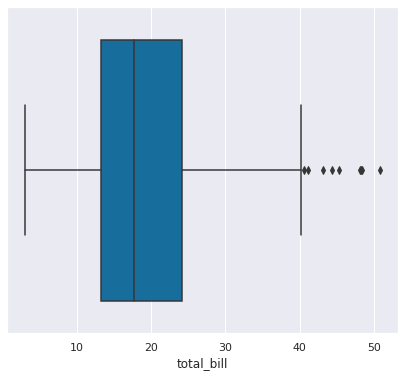

In [ ]:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=tips["total_bill"]);

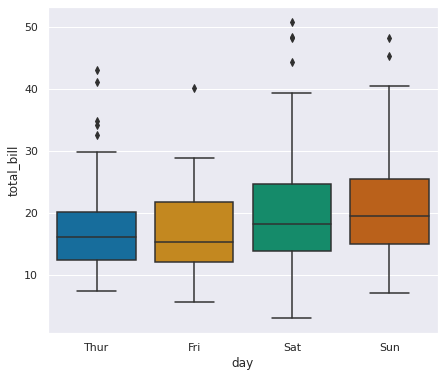

In [ ]:
sns.boxplot(x="day", y="total_bill", 
             #hue="smoker", 
             #orient="h",
            data=tips);           

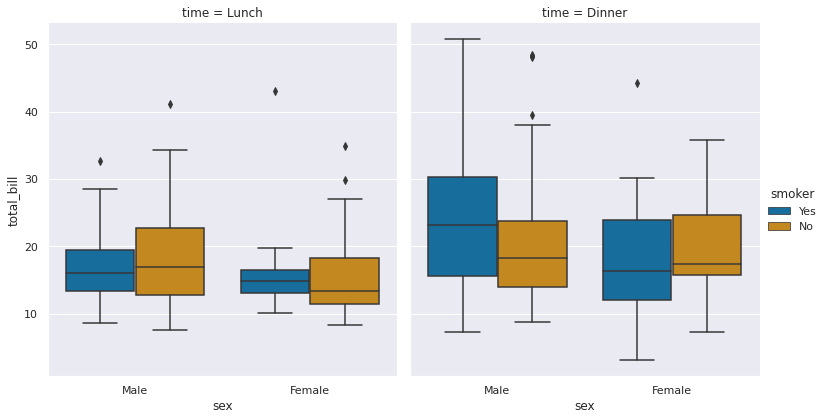

In [ ]:
sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, 
                kind="box", #por ser do tipo catplot poderia ser bar também
                height=6, aspect=.9);

##### Com os pontos

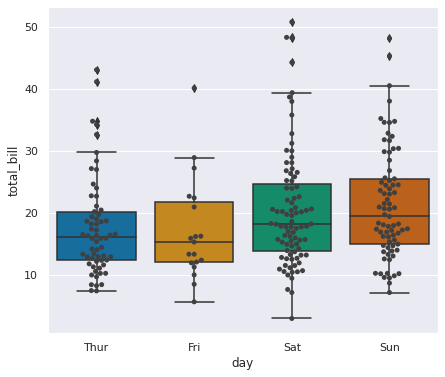

In [ ]:
sns.boxplot(x="day", y="total_bill", data=tips);
sns.swarmplot(x="day", y="total_bill", data=tips, color=".25");

## Gráfico de Dispersão

### Seaborn

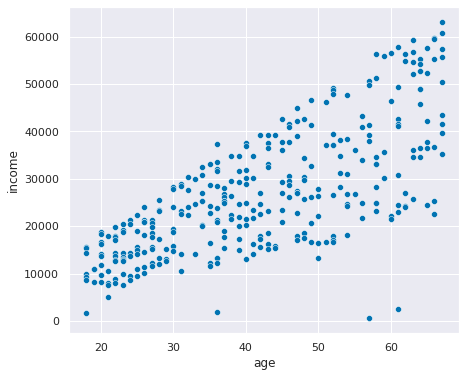

In [ ]:
#https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df, x="age", y="income",
                #hue= 'region',
                #style = 'sex',
                #size = 'married'
                );

#sns.scatterplot(data=tips, x="total_bill", y="tip");                

In [ ]:
#https://seaborn.pydata.org/tutorial/relational.html
sns.relplot(
    data=df, x="age", y="income",
    col="married", hue="sex", style="sex",
    #kind="line",
    #ci = None,
);

### Plotly

#### Dataset

In [ ]:
import pandas as pd
url= ('https://github.com/scudilio/Visualizacao_de_dados/blob/master/datasets/gapminder_final.xlsx?raw=true')
pib = pd.read_excel(url)
pib

,country,year,gdpPercap,lifeExp,pop,continent
0,Afghanistan,1920,1490,30.6,10600000,Asia
1,Afghanistan,1921,1520,30.7,10500000,Asia
2,Afghanistan,1922,1550,30.8,10300000,Asia
3,Afghanistan,1923,1570,30.8,9710000,Asia
4,Afghanistan,1924,1600,30.9,9200000,Asia
...,...,...,...,...,...,...
15650,Zimbabwe,2016,2490,60.5,14000000,Africa
15651,Zimbabwe,2017,2570,61.4,14200000,Africa
15652,Zimbabwe,2018,2620,61.7,14400000,Africa
15653,Zimbabwe,2019,2390,62.0,14600000,Africa


In [ ]:
import plotly.express as px

fig  = px.scatter(pib, x = 'gdpPercap', y = 'lifeExp',  
                  #log_x = True,
                  width = 800)

fig.update_traces(marker = dict(size = 12, line=dict(width = 2)), selector = dict(mode = 'markers'))

fig.update_layout(title = 'PIB per capita X Expectativa de vida')
fig.update_xaxes(title = 'PIB per capita')
fig.update_yaxes(title = 'Expectativa de vida')
fig.show()

#### Cuidados - Overplotting Soluções

In [ ]:
df_sample = pib.sample(n=100)

fig = px.scatter(df_sample, x = 'gdpPercap', y = 'lifeExp',  width = 800,
                 #opacity=0.5,
                 )

#fig.update_traces(marker = dict(size=12, line = dict(width=2)),selector=dict(mode = 'markers'))

fig.update_layout(title = 'PIB per capita X Expectativa de vida')
fig.update_xaxes(title ='Log (PIB per capita)')
fig.update_yaxes(title = 'Expectativa de vida')
fig.show()

#### Variações

In [ ]:
df_2019 = pib[pib["year"] == 2019]

fig = px.scatter(df_2019, x = "gdpPercap", y = "lifeExp", hover_name = "country",  width = 800)
fig.show()

##### Trivariado Categórico

In [ ]:
fig = px.scatter(df_2019, x = 'gdpPercap', y = 'lifeExp', 
                 color = 'continent', 
                 size = "pop",
                 hover_name = "country",
                 #symbol = "continent",
                 width = 800)

fig.update_traces(marker=dict(size = 12,line = dict(width = 2)),selector=dict(mode = 'markers'))

fig.show()

##### Trivariado Numérico

In [ ]:
fig = px.scatter(df_2019, x = "gdpPercap", y = "lifeExp", size = "pop", hover_name = "country", 
                 color = 'pop',
                 size_max = 60, 
                 width = 800) 
fig.show()

##### Multivariado

In [ ]:


fig=px.scatter(df_2019, x = "gdpPercap", y = "lifeExp", size = "pop", color = "continent",
               hover_name = "country", 
               #log_x = True, 
               size_max = 60, width = 800)
fig.show()

##### Animado

In [ ]:
px.scatter(pib, x = "gdpPercap", y = "lifeExp", 
           animation_frame = "year", animation_group = "country",
           size = "pop", color = "continent", hover_name = "country", log_x = True,
           width = 900, size_max = 60, 
           range_x = [100,100000], range_y = [15,90])

##### Linha de tendência

In [ ]:
fig = px.scatter(df_sample, x = "gdpPercap", y = "lifeExp", hover_name = "country", 
                 trendline="ols", 
                 #log_x=True,
                 #trendline_options=dict(log_x=True), ## Eixo X com escala log e ajuste transformado em log
                 #size_max = 60, 
                 width = 800)
fig.show()